In [1]:
# needed libraries

import os, cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Function from the main repo

def load_cell_image(fname):
    with Image.open(fname) as image:
        return np.asarray(image)
        
def load(fname='labels.csv'):
    data = np.genfromtxt(fname, dtype=['|S19', 'f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])
    
    dir = os.path.dirname(fname)

    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    return images, probs, types

In [3]:
# importing images_names and data from labels.csv file
images_names = [image for image in os.listdir('images')]
images, probs, types = load('labels.csv')

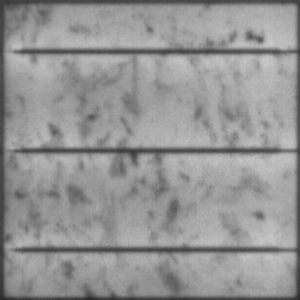

In [7]:
# showing one picture
im = Image.fromarray(images[0])
im

In [45]:
# converting the probabilities into 2 classes
# (0,0.33) = 0
# (0.66 ,1) = 1

probs[(probs > 0) & (probs < 0.34)] = 0
probs[(probs > 0.65) & (probs < 1)] = 1

#for i in probs:
#    print(i)

In [10]:
# function for showing images

def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()

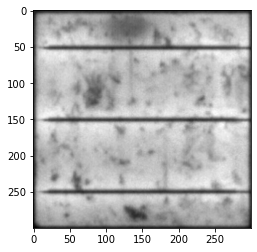

In [11]:
# now preparing the pictures to be in the same size and gray color

newsize = (300, 300)
for img in images:
    img = Image.fromarray(img)
    img = img.resize(newsize)
    
imshow(img)

In [12]:
pwd

'C:\\Users\\Menna\\Downloads\\elpv-dataset-master'